In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))
print(os.path.abspath(os.path.join("..")))

/media/edint/64d115f7-57cc-417b-acf0-7738ac091615/Ivern/WorkSpace/CNN


In [2]:
from dataset import download_dataset

loader_dict = download_dataset()
train_loader = loader_dict["train"]
test_loader = loader_dict["test"]


# CIFAR-10 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트셋에서 일부 샘플 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [3]:
from mobilenet.mobilenet_3 import MobileNetV3Small

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")
model = MobileNetV3Small(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Device : cuda


/home/edint/Ivern/WorkSpace/CNN/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
print('Start Training...')
epochs = 30

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    # ---- Training ----
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    print(
        f"[Epoch {epoch+1}] Train Loss: {running_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}%"
    )

    # ---- Validation ----
    model.eval()
    correct, total = 0, 0
    val_loss_sum = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss_sum  += criterion(outputs, labels).item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss_sum / len(test_loader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(
        f"           Val Loss: {val_loss/len(test_loader):.4f} | Val Acc: {val_acc:.2f}%\n"
    )
    torch.save(model.state_dict(), "mobilenetv3_small_cifar10.pth")

Start Training...
[Epoch 1] Train Loss: 1.2992 | Train Acc: 52.50%
           Val Loss: 0.0070 | Val Acc: 61.89%

[Epoch 2] Train Loss: 0.8567 | Train Acc: 70.05%
           Val Loss: 0.0046 | Val Acc: 74.71%

[Epoch 3] Train Loss: 0.6691 | Train Acc: 76.60%
           Val Loss: 0.0041 | Val Acc: 77.32%

[Epoch 4] Train Loss: 0.5701 | Train Acc: 80.20%
           Val Loss: 0.0037 | Val Acc: 80.01%

[Epoch 5] Train Loss: 0.4986 | Train Acc: 82.61%
           Val Loss: 0.0035 | Val Acc: 81.10%

[Epoch 6] Train Loss: 0.4513 | Train Acc: 84.53%
           Val Loss: 0.0031 | Val Acc: 83.46%

[Epoch 7] Train Loss: 0.4078 | Train Acc: 85.83%
           Val Loss: 0.0031 | Val Acc: 84.11%

[Epoch 8] Train Loss: 0.3740 | Train Acc: 87.01%
           Val Loss: 0.0030 | Val Acc: 84.78%

[Epoch 9] Train Loss: 0.3402 | Train Acc: 88.15%
           Val Loss: 0.0028 | Val Acc: 85.17%

[Epoch 10] Train Loss: 0.3105 | Train Acc: 89.09%
           Val Loss: 0.0030 | Val Acc: 84.66%

[Epoch 11] Train Loss

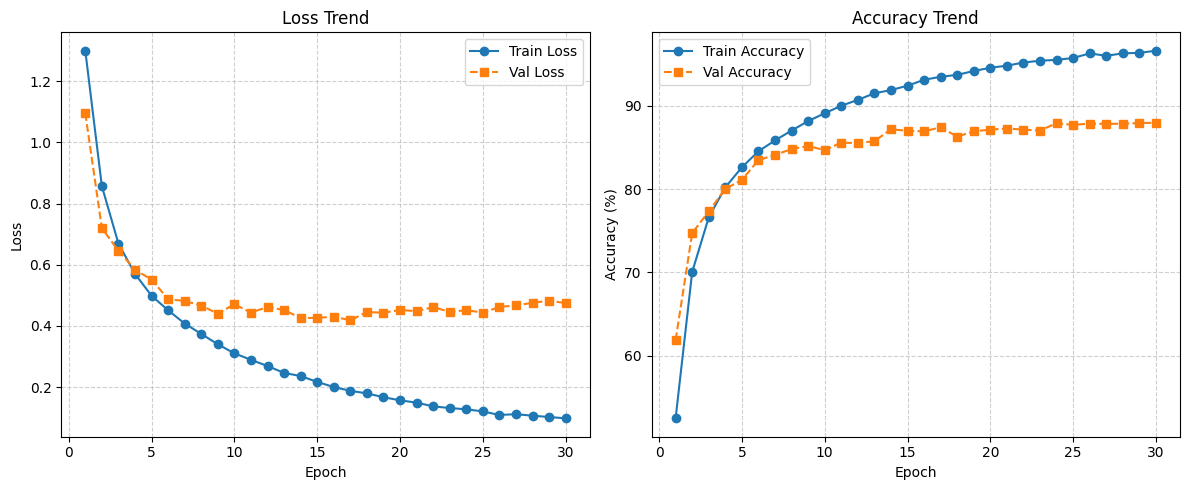

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, 'o-', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, 's--', label='Val Loss')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accs, 'o-', label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, 's--', label='Val Accuracy')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()